# Prediction of the popularity on Spotify Music 

## Challenge Datacamp

This repository has been made by 6 students of the IP Paris schools **Margaux Boscary**, **Paul Fayard**, **Tom Reppelin**, **Vladimir Kondratyev**, **Guillaume Peltier**, and **Jean Pachebat,**.

It was created as an assignement for the Data Camp 2022.


<img src="images/logo-ecoles.jpeg">

<img src="images/Spotify_logo.svg">

## Introduction

Spotify is a platform for streaming all kinds of music.
Today we know that we consume a lot of music. Spotify makes it easy for us to access music in real time and with no limits.

There are many playlists of all kinds on Spotify that gather artists according to their popularity in a genre, a theme of music or in a country.

***They even account for 50% of all listening on the platform.***

Spotify has 83 million paying subscribers and 345 million monthly active users.


<img src="images/user.png"  width = 600  height = 800>

***35% of Spotify's monthly active users live in Europe.*** That equates to over 120 million monthly active users in the EU alone.

<img src="images/eu_users.png" width = 600  height = 800>


***9.4 million French people pay to listen to music.***
All of us who take the RER B train every morning are lucky to be able to listen to music during our (long) journey.

Music helps us to feel better, to reduce our stress. Music is an art that can benefit our physical and mental health in numerous ways.

<img src="images/active_users.png" width = 600  height = 800>

Many studies have tried to understand how the popularity of music is based on certain factors.

The goal here is to predict the song popularity based on energy, acoustics, instumentalness, liveness, dancibility, etc. The dataset is large & it is free to you to explore it as much as possible. 
Have you ever wondered why the music you like to listen to every morning is so popular in the world?
This is what you will be able to discover by making this notebook

***Through this notebook we will try to predict by what factor a music becomes trendy.***



---

****Your goal will be to determine from the acoustic characteristics of a music (and the artist's info) if this music will have a popularity above 50.****

If we are able to predict this then we will be able to find new talents just by the characteristics of their music. This will allow for example to send this data to labels who are looking for new artists to sign.
                                                                             
---

### Description of the Data
Our dataset is composed of trendy music from the past decades, their authors and lots of features to discover !

### INPUT

---

 - `uri` : The Spotify URI for the album.

 - `name` : The name of the track.

 - `danceability` : Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

 - `energy`  : Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

 - `loudness` : The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

 - `speechiness`: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

 - `acousticness` : A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

 - `instrumentalness` : Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

 - `liveness` : Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

 - `valence` : A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

 - `tempo` : The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

 - `duration_ms` : The duration of the track in milliseconds.

 - `album_name` : The name of the album.
 - `artist_name_i` : The name of the i-th artist.
 - `artist_uri_i` : the Spotify URI for the i-th artist
 - `release_album_date` : date of the album release.

---

### OUTPUT

--- 
`popularity` : The popularity of the artist. The value will be between 0 and 100, with 100 being the most popular. The artist's popularity is calculated from the popularity of all the artist's tracks.
    
---

## I - Loading the data

### MANDATORY IMPORT

In [13]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [14]:
sns.set_style('darkgrid')

In [20]:
df_artist = pd.read_csv('data/df_artist.csv', low_memory=False)
df_music = pd.read_csv('data/df_music.csv', low_memory=False)
df_music = df_music[~df_music.name.isna()]

## II - Exploratory data analysis

### A) Data Vizualisation


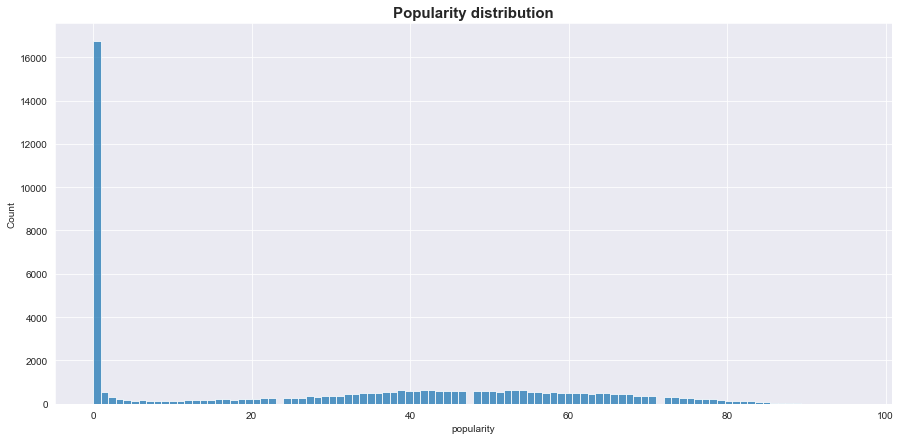

In [21]:
plt.figure(figsize=(15, 7))
plt.title('Popularity distribution', fontsize=15, fontweight="bold")
sns.histplot(data=df_music, x='popularity', bins=100)
plt.show()

<div class="alert alert-block alert-warning"> We can see that most of songs has a popularity equal to 0.
We can supress the corresponding lines that are not interesting.</div>

In [22]:
len(df_music)

47826

In [23]:
# We will keep only the music that has a popularity > 0
len(df_music.query('popularity>0'))

31098

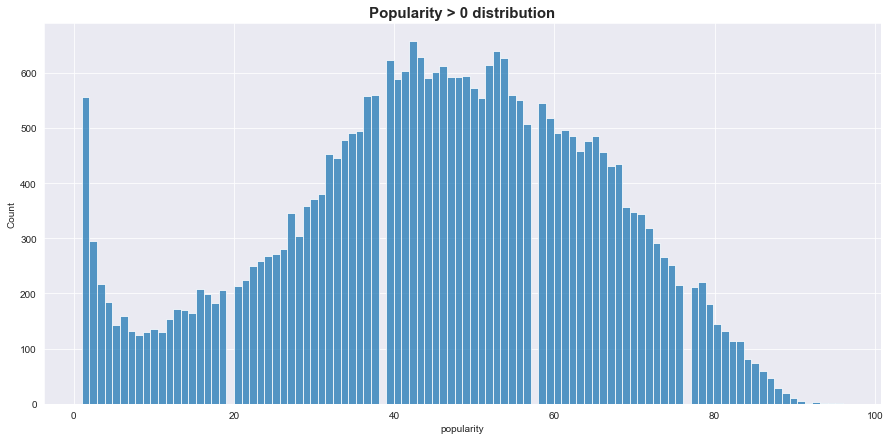

In [24]:
plt.figure(figsize=(15, 7))
plt.title('Popularity > 0 distribution', fontsize=15, fontweight="bold")
sns.histplot(data=df_music.query('popularity>0'), x='popularity', bins=100)
plt.show()

<div class="alert alert-block alert-warning"> The popularity distribution looks like a Gaussian centered in 50. We have also a lot of songs who have a very low popularity (1/100 or 2/100)</div>

In [25]:
df_music.artist_name_1.nunique()

16557

<div class="alert alert-block alert-warning"> For our 31098 songs, we have 16557 different artist names. Embed the artist name with a one-hot encoding will not be efficient due too the too high number of artists. </div>

In [26]:
numerical_col = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
                 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'popularity']

features_col = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
                 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

In [27]:
print(f'We have {len(numerical_col)} numerical columns in our dataset.')

We have 11 numerical columns in our dataset.


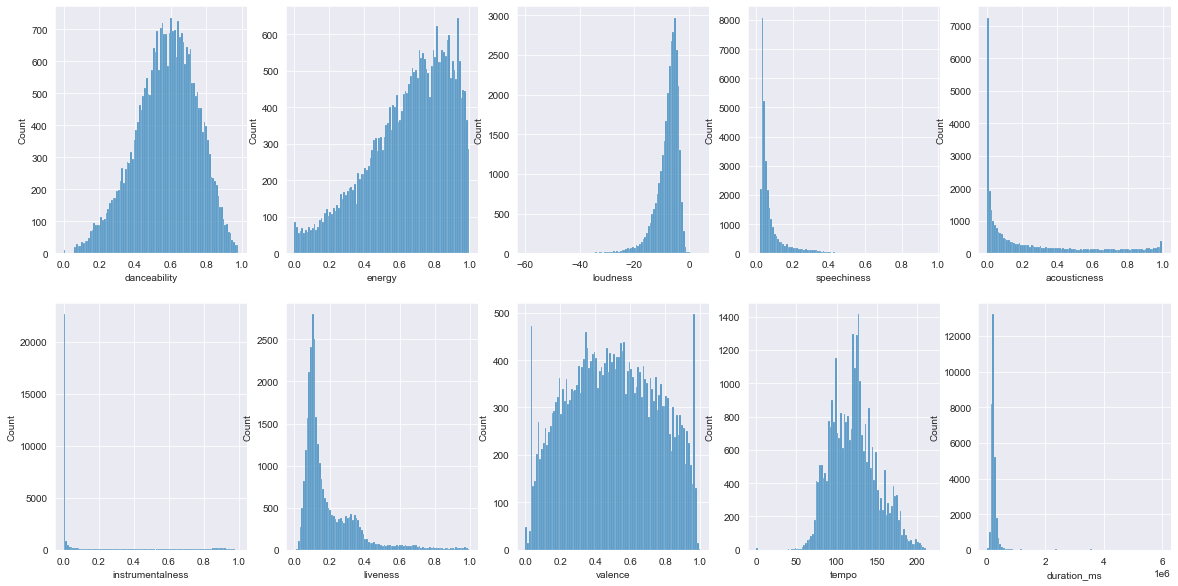

In [28]:
fig, ax = plt.subplots(2, 5, figsize=(20, 10))
for i, num_col in enumerate(features_col) :
    row = int(i // 5)
    col = int(i % 5)
    sns.histplot(data=df_music.query('popularity>0'), x=num_col, bins=100, ax=ax[row][col])
plt.show()

In [29]:
df_music.duration_ms.min() / (1000) #time in s

7.24

In [31]:
df_music.duration_ms.mean() / (60000) #time in mn

4.128754636250854

In [32]:
df_music.duration_ms.max() / (60000) #time in mn

100.01101666666666

<div class="alert alert-block alert-warning"> We can see that :
    
- The danceability, the energy and the valence are roughly homogenously distributed from 0 to 1.
- Other features likes instrumentalness or liveness are more concentrated near 0.
- Other features like tempo or loudness are not between 0 and 1, so we must scale our features
- The duration of our musics are between 7 seconds and 100 minutes, the average is 4mn
 </div>

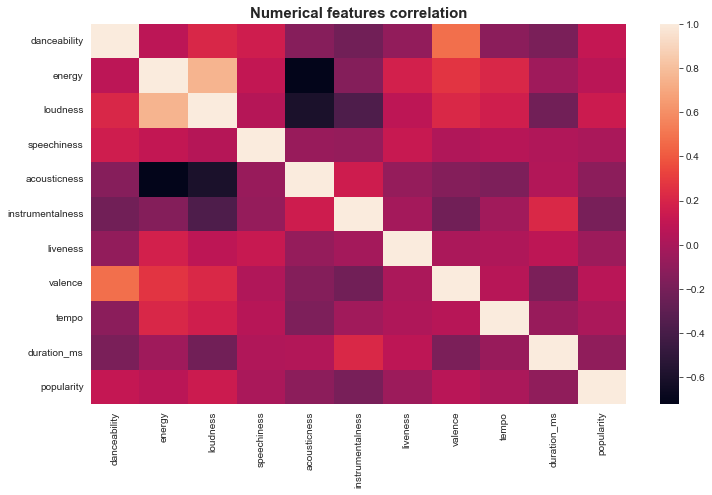

In [33]:
plt.figure(figsize=(12, 7))
plt.title('Numerical features correlation', fontsize=15, fontweight="bold")
sns.heatmap(df_music.query('popularity>0')[numerical_col].corr())
plt.show()

<div class="alert alert-block alert-warning"> We can see that :
    
Some features like the valence and the danceability, or the valence and the energy are logically positevely correlated. 
Maybe there are some redundanies between the features.
 </div>

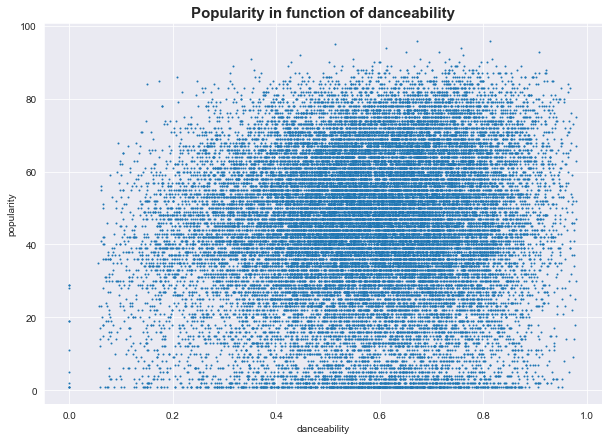

Pearson correlation : 0.11


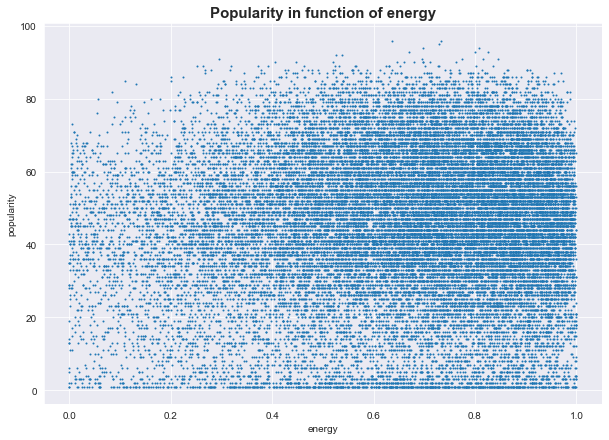

Pearson correlation : 0.07


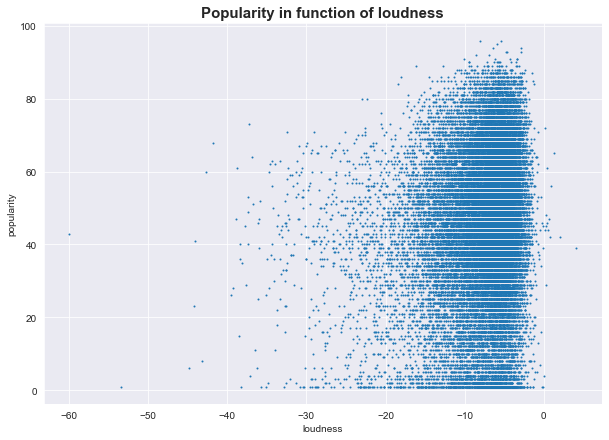

Pearson correlation : 0.14


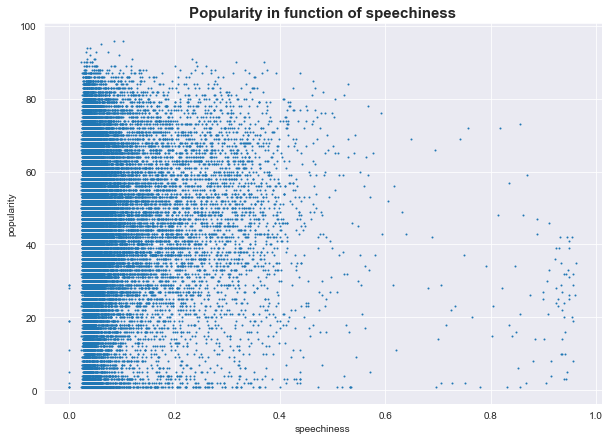

Pearson correlation : -0.0


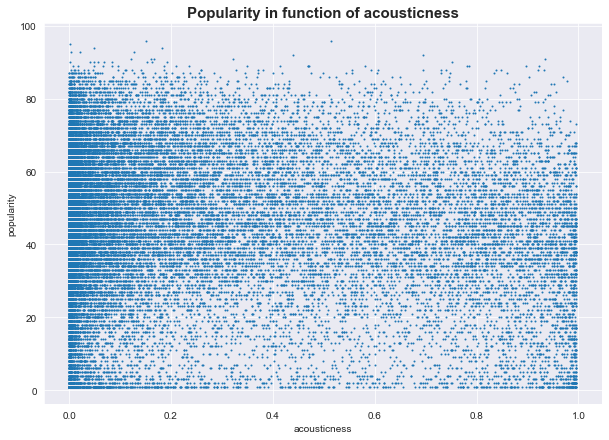

Pearson correlation : -0.12


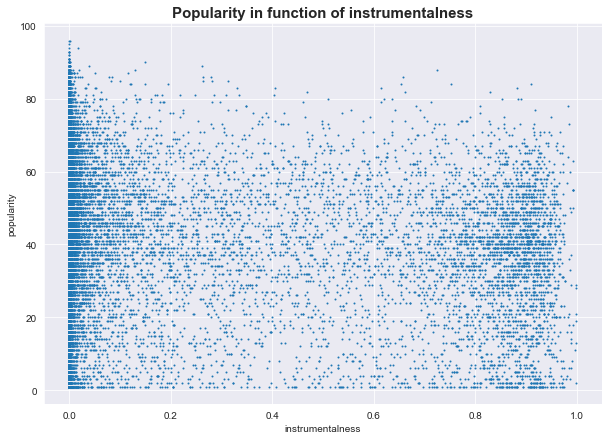

Pearson correlation : -0.19


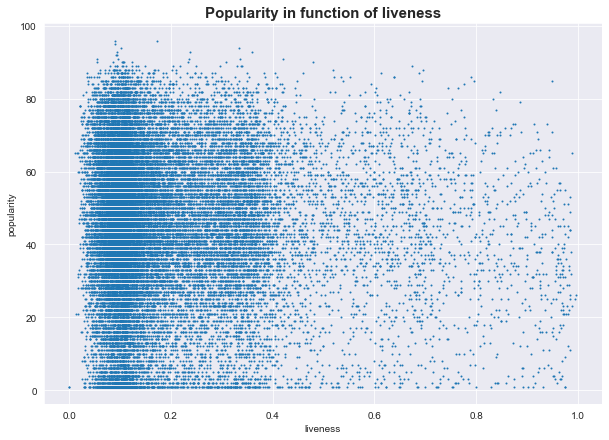

Pearson correlation : -0.05


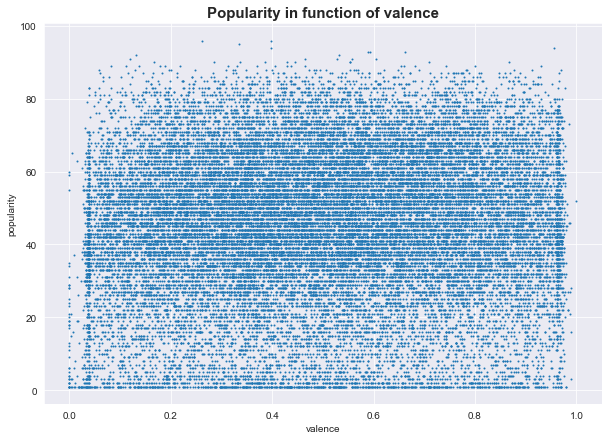

Pearson correlation : 0.06


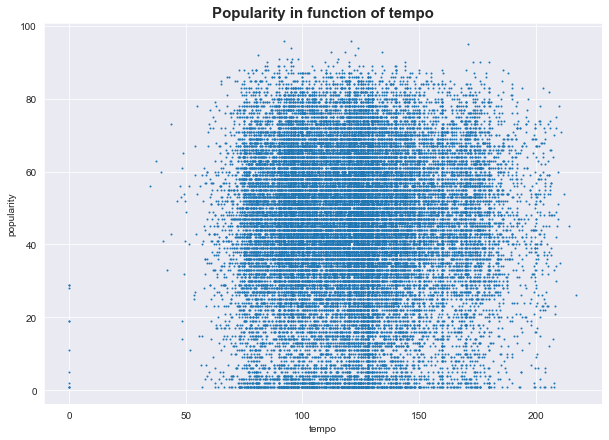

Pearson correlation : 0.01


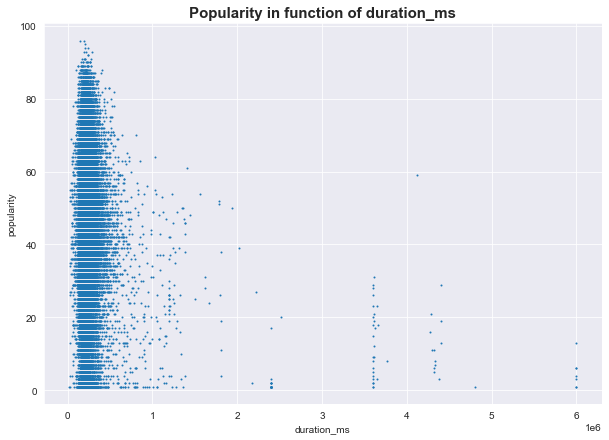

Pearson correlation : -0.1


In [34]:
df_pop_pos = df_music.query('popularity>0')
for numerical_col in features_col:
    plt.figure(figsize=(10, 7))
    plt.title(f'Popularity in function of {numerical_col}', fontsize=15, fontweight='bold')
    plt.xlabel(numerical_col)
    plt.ylabel('popularity')
    x = df_pop_pos[numerical_col]
    y = df_pop_pos.popularity
    plt.scatter(x=x, y=y, s=1)
    plt.show()
    corr = np.round(np.corrcoef(x, y)[0, 1], 2)
    print(f'Pearson correlation : {corr}')

#### Seasonality

In [35]:
def get_month(date):
    if len(date)>4:
        return pd.to_datetime(date).month
    return 0

def get_day_of_week(date):
    if len(date)>4:
        return pd.to_datetime(date).dayofweek
    return 0

In [36]:
df_music['year']  = df_music['album_date'].apply(lambda date : pd.to_datetime(date).year)
df_music['month']  = df_music['album_date'].apply(lambda date : get_month(date))
df_music['day_of_week']  = df_music['album_date'].apply(lambda date : get_month(date))

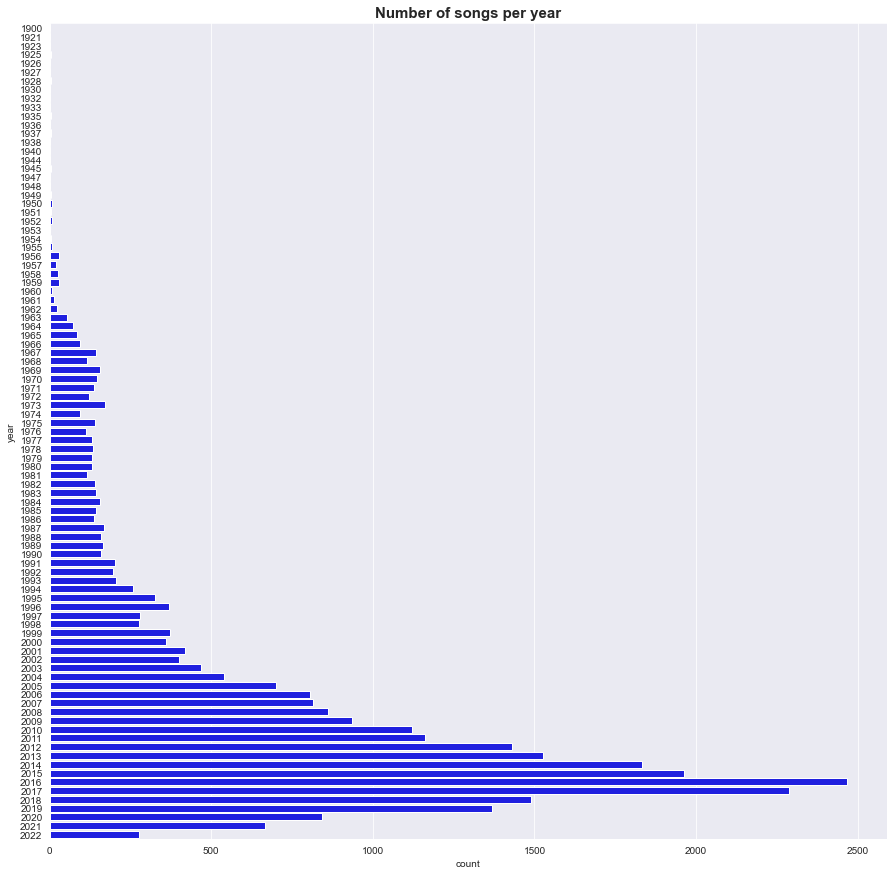

In [37]:
plt.figure(figsize=(15, 15))
plt.title('Number of songs per year', fontsize=15, fontweight="bold")
sns.countplot(data = df_music.query('popularity>0'), y='year', color='Blue')
plt.show()

<div class="alert alert-block alert-warning">
    
Most of the songs that we study are recent songs.
 </div>

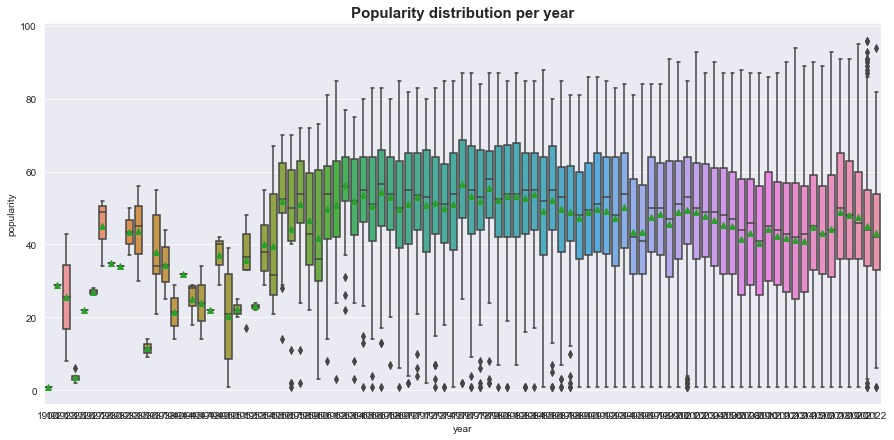

In [38]:
plt.figure(figsize=(15, 7))
plt.title('Popularity distribution per year', fontsize=15, fontweight="bold")
sns.boxplot(data=df_music.query('popularity>0'), x='year', y='popularity', showmeans=True)
plt.show()

<div class="alert alert-block alert-warning">
 
The oldest songs have a tendency to be most popular. In fact, these are songs that are still in current playlists.
 </div>

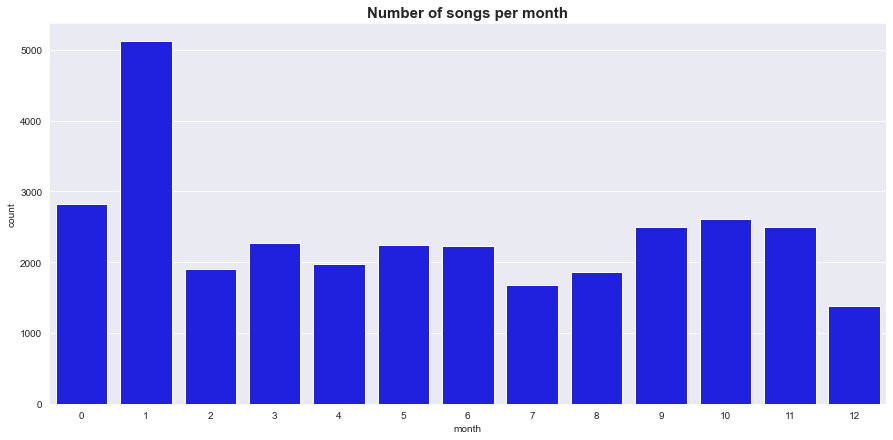

In [39]:
plt.figure(figsize=(15, 7))
plt.title('Number of songs per month', fontsize=15, fontweight="bold")
sns.countplot(data = df_music.query('popularity>0'), x='month', color='Blue')
plt.show()

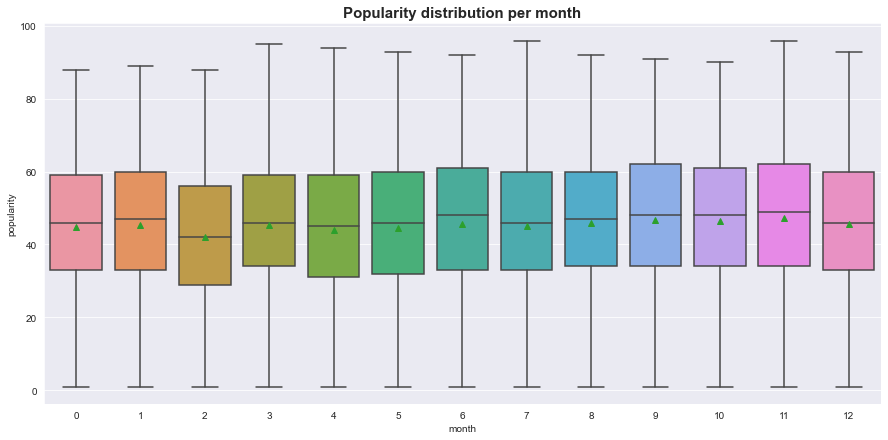

In [40]:
plt.figure(figsize=(15, 7))
plt.title('Popularity distribution per month', fontsize=15, fontweight="bold")
sns.boxplot(data=df_music.query('popularity>0'), x='month', y='popularity', showmeans=True)
plt.show()

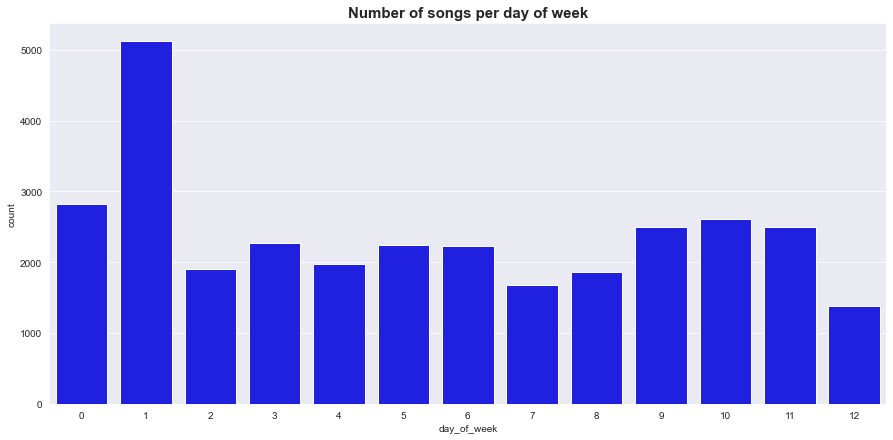

In [41]:
plt.figure(figsize=(15, 7))
plt.title('Number of songs per day of week', fontsize=15, fontweight="bold")
sns.countplot(data = df_music.query('popularity>0'), x='day_of_week', color='Blue')
plt.show()

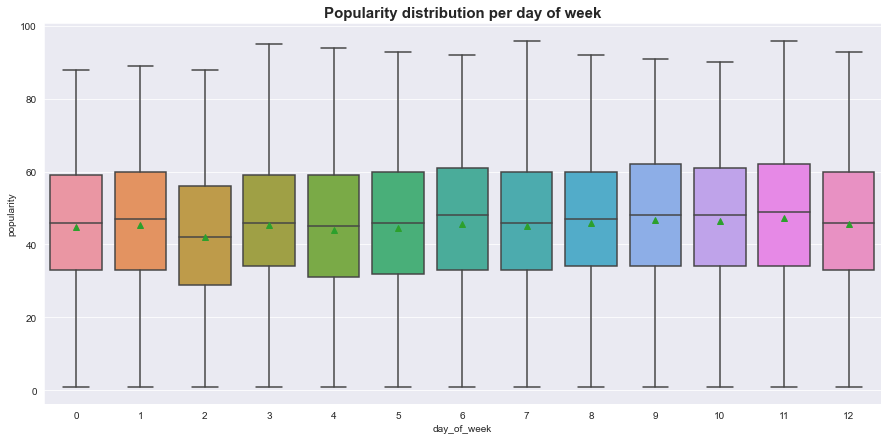

In [42]:
plt.figure(figsize=(15, 7))
plt.title('Popularity distribution per day of week', fontsize=15, fontweight="bold")
sns.boxplot(data=df_music.query('popularity>0'), x='day_of_week', y='popularity', showmeans=True)
plt.show()

<div class="alert alert-block alert-warning">
 
The month of January and the day of week Monday are the days when the most music is released. But these information alone do not seem to have a huge influence on song's popularity.
    
</div>

### B) Data Cleaning (Encoding, Outliers..)


In our selected features, we have not included any categorical information concerning the genre of music of the artist. It could be interesting to add this information to your features. To do so, you can practice a One-Hot Encoding.

In [43]:
n_genres = df_artist.genre_artist_0.nunique()
print(f'There are {n_genres} different genre of artists.')

There are 3930 different genre of artists.


However, there are too much different genres. Maybe it's more interesting to consider only the most popular genre, that will appear a lot of time in the dataset. You could use the following cells, and modify it a bit to do your own encoding.

In [44]:
tmp = df_artist.groupby('genre_artist_0')['artist_uri'].count().reset_index()

#Let's consider only the genre that corresponds to more than 50 arttists
genres = tmp.query('artist_uri > 50').genre_artist_0

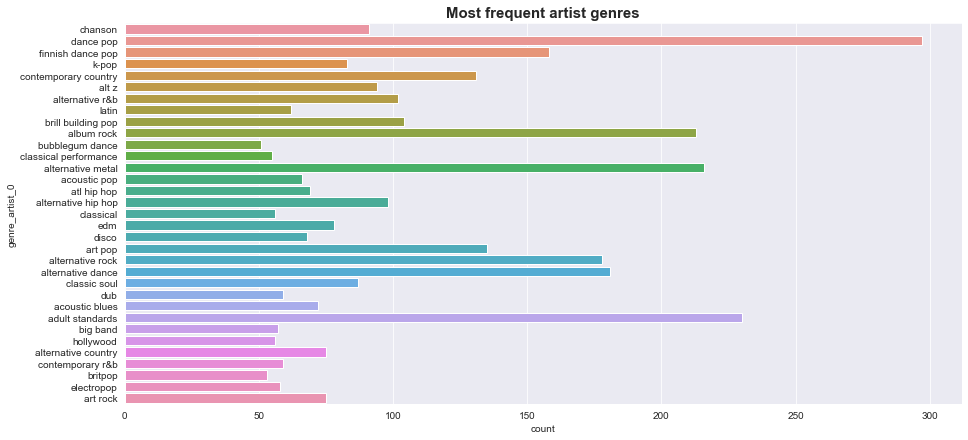

In [45]:
plt.figure(figsize=(15, 7))
plt.title('Most frequent artist genres', fontsize=15, fontweight="bold")
sns.countplot(data=df_artist[df_artist.genre_artist_0.isin(genres)], y='genre_artist_0')
plt.show()

In [46]:
df_music_enriched = df_music.merge(df_artist[['artist_uri', 'genre_artist_0']], 
                                   left_on='artist_uri_1', right_on='artist_uri')

# Add genre encoding

for genre in genres:
    df_music_enriched[f'is_{genre}'] = (df_music_enriched['genre_artist_0'] == genre).astype(int)

In [47]:
df_music_enriched[f'is_dance pop'].mean()

0.07138376615230209

7% of the music have been done by a artist that has the genre 'dance pop'.

### C) Features


## III - Model testing

In [54]:
#Selecting numerical columns for classification.
col_train = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
                 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

X_df = df_music[col_train]
y = np.array(df_music_enriched['is_top50'])

In [56]:
#A look at X_df.
X_df.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.390,0.06920,-23.312,0.0905,0.4350,0.504,0.0822,0.0433,76.465,740413
1,0.283,0.00966,-28.107,0.0327,0.9930,0.807,0.0884,0.1080,103.468,259042
2,0.694,0.76100,-4.087,0.0372,0.4460,0.000,0.2890,0.5500,114.947,208466
3,0.499,0.95400,-6.108,0.0604,0.0322,0.000,0.0825,0.4870,99.026,207124
4,0.646,0.27900,-3.575,0.0545,0.1490,0.915,0.0993,0.7150,120.063,147586


**Data imbalance**

In [57]:
sum(y)/len(y)

0.7246058629197507

The data is not well balanced so a way to improve accuracy would be to deal with this. 

### Modelling

In [58]:
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn.pipeline import make_pipeline

# Models
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import neighbors

In [59]:
#Scaling the data
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X_df)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, random_state=42)

In [60]:
# Parameters for k-NN
n_neighbors = 15

# Models
models = [MLPClassifier(solver='lbfgs', alpha=1e-5,
                        hidden_layer_sizes=(20, 20, 2), 
                        random_state=1),
          tree.DecisionTreeClassifier(),
          neighbors.KNeighborsClassifier(n_neighbors, weights='uniform'), 
          RandomForestClassifier(n_estimators=500)]


# Model training
for model in models:

    clf = model
    clf.fit(X_train, y_train)
    
    print(model, ' score:', clf.score(X_test, y_test))
    print('----------------------------------------------------------------')
    if model == tree.DecisionTreeClassifier():
        tree.plot_tree(clf)

/Users/guillaume/Library/Caches/pypoetry/virtualenvs/challenge-spotify-hvAV1gbS-py3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(20, 20, 2), max_iter=500,
              random_state=1, solver='lbfgs')  score: 0.7217529480638957
----------------------------------------------------------------
DecisionTreeClassifier()  score: 0.593376264949402
----------------------------------------------------------------
KNeighborsClassifier(n_neighbors=15)  score: 0.7093752613531822
----------------------------------------------------------------
RandomForestClassifier(n_estimators=500)  score: 0.7148114075436982
----------------------------------------------------------------
